# Caso 3: Bike Sharing Clasificación

# Paso 1: Muestra
Primero, importe librerias, cargue el conjunto de datos y verifique su tamaño. A continuación, realice un vistazo preliminar a los datos para entender su estructura y contenido.

## 1.1 Importar librerias
Se inicia importando las librerías necesarias. Usamos `Pandas` para la manipulación de datos, `NumPy` para cálculos matemáticos, `Matplotlib` y `Seaborn` para visualizaciones. Las bibliotecas de `Scikit-Learn` se utilizan para operaciones de aprendizaje automático.

In [1]:
# Importaciones básicas de pandas y numpy
import pandas as pd
import numpy as np

# Visualización con matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métodos de división de datos
from sklearn.model_selection import train_test_split

# Modelos de clasificación de sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación de modelos
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

## 1.2 Cargar el conjunto de datos
Cargamos el conjunto de datos del archivo xlsx.

In [2]:
# Cargar el conjunto de datos
df_bike_sharing = pd.read_excel("Clasificacion-Bike Sharing.xlsx")

In [3]:
# Ver las primeras filas del conjunto de datos
pd.options.display.max_columns = None
df_bike_sharing.head(5)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1986-10-06,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,Pacific,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1991-05-10,S,NaN,M,eugene10@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,Pacific,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1986-02-09,M,NaN,M,ruben35@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,Pacific,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1988-08-14,S,NaN,F,christy12@adventure-works.com,70000,0,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,Pacific,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1994-08-05,S,NaN,F,elizabeth5@adventure-works.com,80000,5,5,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,Pacific,1


#### Interpretación para las columnas del dataset de "Bike Sharing"
- **CustomerKey**: Identificador único para cada cliente en el conjunto de datos.
- **GeographyKey**: Código asociado a la ubicación geográfica del cliente.
- **CustomerAlternateKey**: Identificador alternativo o clave secundaria para los clientes.
- **Title**: Título honorífico del cliente (Mr., Ms., Mrs., Sr., etc.).
- **FirstName**: Nombre del cliente.
- **MiddleName**: Segundo nombre o inicial del cliente.
- **LastName**: Apellido del cliente.
- **NameStyle**: Indicador binario para el estilo de nombre (0 indica estilo normal).
- **BirthDate**: Fecha de nacimiento del cliente.
- **MaritalStatus**: Estado civil del cliente (S para soltero, M para casado).
- **Suffix**: Sufijo que indica el nombre del cliente, señala un título adicional como Jr.
- **Gender**: Género del cliente (M para masculino, F para femenino).
- **EmailAddress**: Dirección de correo electrónico del cliente.
- **YearlyIncome**: Ingreso anual del cliente en dólares.
- **TotalChildren**: Total de hijos del cliente.
- **NumberChildrenAtHome**: Número de hijos que viven en casa con el cliente.
- **EnglishEducation**: Nivel educativo del cliente en inglés.
- **SpanishEducation**: Nivel educativo del cliente en español.
- **FrenchEducation**: Nivel educativo del cliente en francés.
- **EnglishOccupation**: Ocupación del cliente en inglés.
- **SpanishOccupation**: Ocupación del cliente en español.
- **FrenchOccupation**: Ocupación del cliente en francés.
- **HouseOwnerFlag**: Indicador de si el cliente es propietario de su vivienda (0 para no, 1 para sí).
- **NumberCarsOwned**: Número de automóviles que posee el cliente.
- **AddressLine1**: Primera línea de la dirección del cliente.
- **AddressLine2**: Segunda línea de la dirección del cliente.
- **Phone**: Número de teléfono del cliente.
- **DateFirstPurchase**: Fecha en que el cliente realizó su primera compra.
- **CommuteDistance**: Distancia que recorre el cliente para ir al trabajo.
- **Region**: Región geográfica del cliente (North America, Europe, Pacific).
- **BikeBuyer**: Indicador de si el cliente ha comprado una bicicleta (0 para sí, 1 para no).

In [4]:
# Muestra la estructura, incluyendo tipos de datos y conteo de valores no nulos.
print(df_bike_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   GeographyKey          18484 non-null  int64         
 2   CustomerAlternateKey  18484 non-null  object        
 3   Title                 101 non-null    object        
 4   FirstName             18484 non-null  object        
 5   MiddleName            10654 non-null  object        
 6   LastName              18484 non-null  object        
 7   NameStyle             18484 non-null  int64         
 8   BirthDate             18484 non-null  datetime64[ns]
 9   MaritalStatus         18484 non-null  object        
 10  Suffix                3 non-null      object        
 11  Gender                18484 non-null  object        
 12  EmailAddress          18484 non-null  object        
 13  YearlyIncome    

## 1.3 Verificar el tamaño del conjunto de datos
Se procede a comprobar cuántas filas y columnas contiene el conjunto de datos.

In [5]:
rows, columns = df_bike_sharing.shape
print(f"Filas: {rows}, Columnas: {columns}")

Filas: 18484, Columnas: 31


# Paso 2: Explorar
En esta etapa, calcule estadísticas resumidas para obtener una visión general de los datos. A continuación, visualice la distribución de las características clave para identificar patrones y tendencias. Además, verifique si existen anomalías en los datos, como valores faltantes y valores atípicos, que podrían afectar el análisis posterior.

## 2.1 Estadísticas resumidas
Calculamos estadísticas como media, desviación estándar, y otros valores útiles para comprender la variabilidad de cada variable numérica.

In [6]:
summary_statistics = df_bike_sharing.describe()

summary_statistics

,CustomerKey,GeographyKey,NameStyle,BirthDate,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,BikeBuyer
count,18484.000000,18484.000000,18484.0,18484,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484,18484.000000
mean,20241.500000,257.956287,0.0,1984-04-28 10:44:11.893529536,57305.777970,1.844352,1.004058,0.676369,1.502705,2013-02-15 06:10:59.078121472,0.494049
min,11000.000000,2.000000,0.0,1931-02-10 00:00:00,10000.000000,0.000000,0.000000,0.000000,0.000000,2010-12-29 00:00:00,0.000000
25%,15620.750000,62.000000,0.0,1976-10-06 00:00:00,30000.000000,0.000000,0.000000,0.000000,1.000000,2012-10-12 00:00:00,0.000000
50%,20241.500000,240.000000,0.0,1986-07-13 00:00:00,60000.000000,2.000000,0.000000,1.000000,2.000000,2013-05-04 00:00:00,0.000000
75%,24862.250000,345.000000,0.0,1993-08-31 00:00:00,70000.000000,3.000000,2.000000,1.000000,2.000000,2013-09-10 00:00:00,1.000000
max,29483.000000,654.000000,0.0,2001-06-25 00:00:00,170000.000000,5.000000,5.000000,1.000000,4.000000,2014-01-28 00:00:00,1.000000
std,5336.015523,196.531062,0.0,NaN,32285.841703,1.612408,1.522660,0.467874,1.138394,NaN,0.499978


## 2.2 Visualización de Datos
Visualizaremos la distribución de características clave como YearlyIncome, TotalChildren, NumberCarsOwned, y CommuteDistance. Esto nos ayudará a entender la variabilidad y tendencias en los datos.

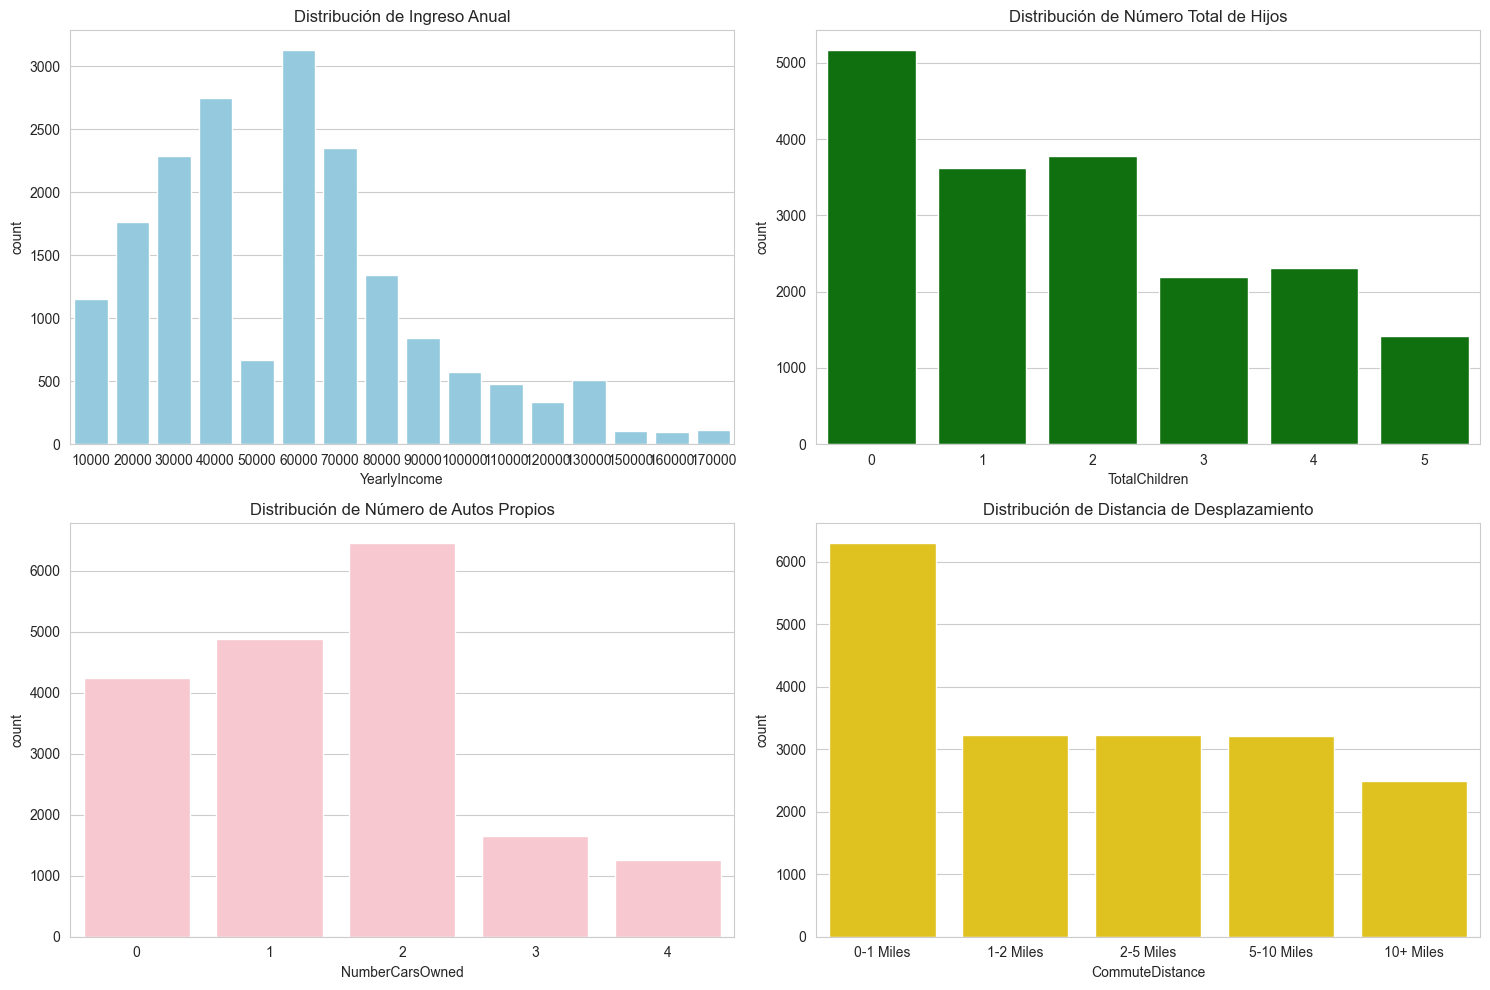

In [7]:
# Configurando el estilo para los gráficos
sns.set_style("whitegrid")

# Inicializando la figura
plt.figure(figsize=(15, 10))

# Gráfico de barras de 'YearlyIncome'
plt.subplot(2, 2, 1)
sns.countplot(x='YearlyIncome', data=df_bike_sharing, color='skyblue')
plt.title('Distribución de Ingreso Anual')

# Gráfico de barras de 'TotalChildren'
plt.subplot(2, 2, 2)
sns.countplot(x='TotalChildren', data=df_bike_sharing, color='green')
plt.title('Distribución de Número Total de Hijos')

# Gráfico de barras de 'NumberCarsOwned'
plt.subplot(2, 2, 3)
sns.countplot(x='NumberCarsOwned', data=df_bike_sharing, color='pink')
plt.title('Distribución de Número de Autos Propios')

# Gráfico de barras de 'CommuteDistance'
plt.subplot(2, 2, 4)
sns.countplot(x='CommuteDistance', data=df_bike_sharing, color='gold', order=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'])
plt.title('Distribución de Distancia de Desplazamiento')

# Ajustando el diseño
plt.tight_layout()
plt.show()

A continuación, se presentan las distribuciones de características clave:
- Ingreso Anual: La mayoría de los clientes tiene un ingreso anual entre 20,000 y 70,000, con un pico notable alrededor de 60,000. La distribución parece estar sesgada hacia la derecha, indicando que hay algunos clientes con ingresos significativamente más altos, aunque son menos comunes.

- Número Total de Hijos: La mayoría de los clientes no tiene hijos (0 hijos), seguido por aquellos que tienen 1 o 2 hijos. A medida que aumenta el número de hijos, la cantidad de clientes disminuye, lo cual sugiere que tener más de 2 hijos es menos frecuente entre los clientes.

- Número de Autos Propios: La distribución muestra que la mayoría de los clientes posee entre 1 y 2 autos, siendo 2 autos la cantidad más común. Muy pocos clientes poseen 3 o más autos, y una cantidad significativa no posee autos propios.

- Distancia de Distancia Desplazamiento: La mayoría de los clientes vive a una distancia corta de su lugar de trabajo (0-1 millas). Las demás distancias son menos comunes, lo que indica que la mayoría de los clientes reside relativamente cerca de su trabajo.

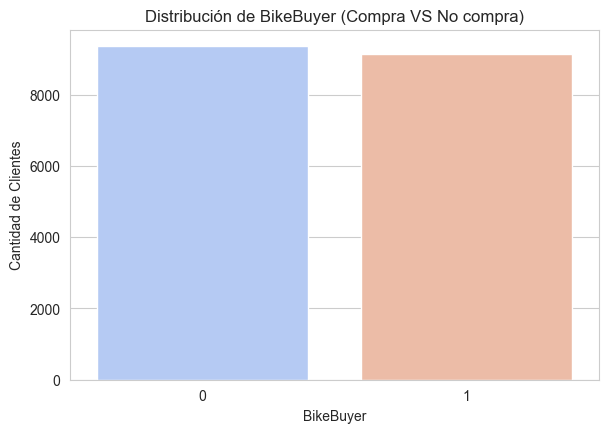

In [8]:
# Gráfico de barras de 'BikeBuyer' (variable objetivo)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='BikeBuyer', data=df_bike_sharing, hue='BikeBuyer', palette="coolwarm", legend=False)
plt.title('Distribución de BikeBuyer (Compra VS No compra)')
plt.ylabel('Cantidad de Clientes')
plt.show()

- BikeBuyer: La distribución de la variable BikeBuyer muestra que la cantidad de clientes que SÍ han comprado una bicicleta (valor 0) es muy similar a la de aquellos que NO la han comprado (valor 1), por lo que existe un equilibrio en la clase objetivo.

## 2.3 Valores Faltantes

Verificamos la cantidad de valores nulos (o faltantes) en cada columna

In [9]:
# Comprobando valores faltantes
valores_faltantes = df_bike_sharing.isnull().sum()

valores_faltantes

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
Region                      0
BikeBuyer                   0
dtype: int64

Manejo de Valores Faltantes:
- Se encontraron valores faltantes en varias columnas, como Title, MiddleName, Suffix, y AddressLine2. Dado que estos atributos son menos relevantes para el modelo de predicción, se sugiere eliminarlos.

# Paso 3: Modificar
En esta fase, se procede a limpiar los datos, abordar las anomalías detectadas y preparar los datos para el modelo.

## 3.1 Limpieza de Datos

In [10]:
# Eliminar columnas con muchos valores nulos
df_bike_sharing.drop(columns=['Title', 'MiddleName', 'Suffix', 'AddressLine2'], inplace=True)

- Se eliminaron columnas no relevantes y con muchos nulos como Title, MiddleName, Suffix, AddressLine2.

In [11]:
# Eliminar columnas que no son relevantes para el modelo
df_bike_sharing.drop(columns=['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'FirstName', 'LastName', 'NameStyle', 'EmailAddress', 'AddressLine1', 'Phone', 'DateFirstPurchase'], inplace=True)

- Se eliminaron columnas como CustomerKey, GeographyKey y CustomerAlternateKey porque son identificadores únicos que no aportan valor predictivo.

- También se eliminaron FirstName, LastName, NameStyle, EmailAddress, AddressLine1 y Phone ya que no son relevantes para la predicción del comportamiento de compra. 

## 3.2 Ingeniería de características
En caso de que sea relevante, se pueden crear nuevas características basadas en las existentes. En este caso, derivamos la variable Age de BirthDate.

In [12]:
# Crear la columna 'Age' a partir de 'BirthDate'
df_bike_sharing['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_bike_sharing['BirthDate']).dt.year
df_bike_sharing.drop(columns=['BirthDate'], inplace=True)

Combinamos niveles de educación y ocupaciones.

In [13]:
# Combinar niveles de educación en una sola columna
df_bike_sharing['Education'] = df_bike_sharing[['EnglishEducation', 'SpanishEducation', 'FrenchEducation']].bfill(axis=1).iloc[:, 0]
df_bike_sharing.drop(columns=['EnglishEducation', 'SpanishEducation', 'FrenchEducation'], inplace=True)

# Combinar ocupaciones en una sola columna
df_bike_sharing['Occupation'] = df_bike_sharing[['EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation']].bfill(axis=1).iloc[:, 0]
df_bike_sharing.drop(columns=['EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation'], inplace=True)

## 3.3 Codificación de Variables Categóricas

Aplicamos un mapeo ordinal a las variables categóricas (`Gender`, `MaritalStatus`, `CommuteDistance`, `Region`, `Education`) para transformarlas en valores numéricos. Cada columna se convierte mediante un diccionario de mapeo específico que refleja el orden o asignación requerida para el análisis.

In [14]:
# Diccionario para el mapeo de las columnas categóricas
category_mappings = {
    'Gender': {'M': 1, 'F': 0},
    'MaritalStatus': {'M': 1, 'S': 0},
    'CommuteDistance': {'0-1 Miles': 1, '1-2 Miles': 2, '2-5 Miles': 3, '5-10 Miles': 4, '10+ Miles': 5},
    'Region': {'North America': 1, 'Europe': 2, 'Pacific': 3},
    'Education': {'Partial High School': 1, 'High School': 2, 'Partial College': 3, 'Bachelors': 4, 'Graduate Degree': 5},
}

# Aplicar mapeo ordinal en columnas especificadas
for col, mapping in category_mappings.items():
    df_bike_sharing[col] = df_bike_sharing[col].map(mapping)

Para `Occupation`, que es una categoría nominal sin orden específico, usamos `LabelEncoder`. 

In [15]:
# Transformar la columna Occupation (nominal) usando LabelEncoder
label_encoder = LabelEncoder()
df_bike_sharing['Occupation'] = label_encoder.fit_transform(df_bike_sharing['Occupation'])

In [16]:
# Muestra del dataset despues de los cambios
df_bike_sharing.sample(10)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,BikeBuyer,Age,Education,Occupation
15948,0,0,20000,0,0,0,1,3,2,1,35,3,2
3770,1,1,30000,1,0,1,0,1,2,1,31,4,0
13155,1,0,20000,1,0,1,0,1,2,1,63,3,2
1813,1,1,30000,1,1,1,0,3,2,1,37,4,0
14488,1,0,40000,1,0,1,0,1,2,1,39,4,4
16097,1,0,70000,2,2,1,0,3,1,1,37,4,4
5220,1,0,30000,1,0,1,1,2,1,1,51,4,4
2241,1,0,40000,2,1,1,2,5,1,1,49,1,4
11294,0,0,70000,0,0,0,1,3,1,1,36,4,3
11440,0,0,30000,0,0,0,0,2,2,1,36,4,0


# Paso 4: Modelar
En esta fase, el objetivo es preparar los datos y aplicar diferentes modelos de clasificación para la variable objetivo BikeBuyer. Inicialmente se separan las características y la etiqueta, los datos se dividen en conjuntos de entrenamiento y prueba. Se evalúan cinco modelos de clasificación:

- GB: Gradient Boosting
- DT: Árbol de Decisión
- KNN: K-Nearest Neighbors
- ET: Extra Trees Classifier
- RF: Random Forest

## 4.1 Dividir el Conjunto de Datos

Procedemos a dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. Para este análisis, utilizamos una división 80-20.

In [17]:
# Definición de variables X e y
X = df_bike_sharing.drop('BikeBuyer', axis=1)
y = df_bike_sharing['BikeBuyer']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobar la forma de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14787, 12), (3697, 12), (14787,), (3697,))

## 4.2 Entrenar Modelos de Clasificación
Entrenamos los cinco modelos de clasificación seleccionados. Para cada modelo, ajustamos los parámetros necesarios y evaluamos su rendimiento utilizando métricas clave, como la matriz de confusión y la curva ROC.

## Modelo 1: Gradient Boosting (GB)

In [18]:
# Entrenamiento del modelo GB
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Reporte de Clasificación para Gradient Boosting:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1884
           1       0.72      0.73      0.72      1813

    accuracy                           0.73      3697
   macro avg       0.73      0.73      0.73      3697
weighted avg       0.73      0.73      0.73      3697



### Rendimiento del modelo de Gradient Boosting:

- **Precisión (Precision)**: Para la clase 0 (clientes que compraron bicicletas), la precisión es del 74%, lo que indica que el 74% de las instancias predichas como compradores realmente lo eran. Para la clase 1 (clientes que no compraron bicicletas), la precisión es del 72%, lo que significa que el 72% de las instancias predichas como no compradores eran efectivamente no compradores.

- **Recall (Sensibilidad)**: El recall para la clase 0 es del 72%, lo que sugiere que el modelo identificó correctamente el 72% de los casos reales de compradores. Para la clase 1, el recall es del 73%, indicando que el modelo detectó correctamente el 73% de los no compradores.

- **F1-Score**: El F1-score para la clase 0 es de 0.73, reflejando un buen equilibrio entre precisión y recall en la identificación de compradores. Para la clase 1, el F1-score es de 0.72, sugiriendo un rendimiento similar en la detección de no compradores.

- **Soporte (Support)**: La cantidad de instancias reales en el conjunto de datos es de 1884 para la clase 0 (compradores) y 1813 para la clase 1 (no compradores), lo que proporciona contexto sobre el tamaño de cada clase y ayuda a interpretar las métricas.

- **Exactitud (Accuracy)**: La exactitud global del modelo es del 73%, lo que indica que el 73% de todas las predicciones fueron correctas, proporcionando una visión general del rendimiento del modelo.

- **Promedio Macro**: Las métricas promedio macro para precisión, recall y F1-score son todas del 73%, lo que implica que el modelo tiene un rendimiento equilibrado entre ambas clases.

- **Promedio Ponderado**: Al igual que el promedio macro, las métricas ponderadas también se sitúan en el 73%, teniendo en cuenta el soporte de cada clase, lo que reafirma el rendimiento consistente del modelo en la clasificación de los datos.

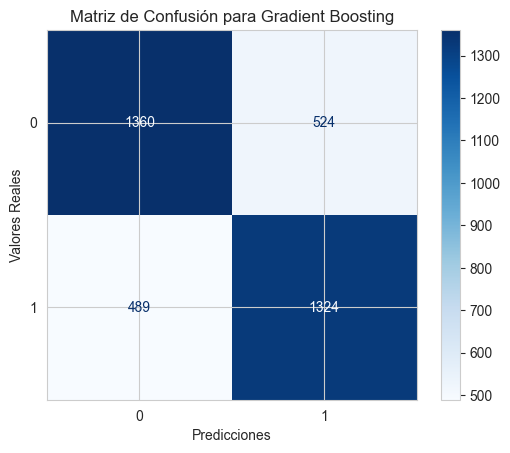

In [19]:
# Matriz de Confusión
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(cm_gb, display_labels=gb_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Gradient Boosting')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

**Interpretación de la Matriz de Confusión**:
- **Verdaderos Negativos**: 1360 clientes fueron correctamente clasificados como compradores de bicicletas.
- **Falsos Positivos**: 524 clientes fueron clasificados incorrectamente como no compradores.
- **Falsos Negativos**: 489 no compradores fueron clasificados incorrectamente como compradores.
- **Verdaderos Positivos**: 1324 no compradores fueron clasificados correctamente.

El modelo Gradient Boosting muestra un desempeño sólido en la clasificación de compradores y no compradores de bicicletas. Aunque tiene algunos errores en ambas clases, logra un buen equilibrio entre falsos positivos y falsos negativos. Este modelo es efectivo en la clasificación, pero existe margen para una pequeña mejora.

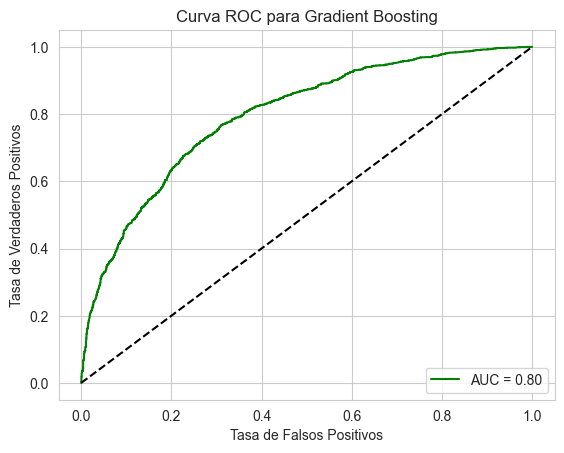

In [20]:
# Curva ROC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.plot(fpr_gb, tpr_gb, color='green', label='AUC = %0.2f' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la Curva ROC**:
En esta gráfica, la curva ROC del modelo Gradient Boosting se aproxima al punto superior izquierdo, lo cual indica una capacidad decente para discriminar entre las clases. El **AUC es 0.80**, lo que sugiere que el modelo tiene un desempeño aceptable en la clasificación.

## Modelo 2: Árbol de Decisión (DT)

In [21]:
# Entrenamiento del modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))


Reporte de Clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1884
           1       0.79      0.72      0.75      1813

    accuracy                           0.77      3697
   macro avg       0.77      0.77      0.77      3697
weighted avg       0.77      0.77      0.77      3697



### Rendimiento del modelo de Árbol de Decisión:

- **Precisión (Precision)**: Para la clase 0 (clientes que compraron bicicletas), la precisión es del 75%, indicando que el 75% de las instancias predichas como compradores realmente lo eran. Para la clase 1 (clientes que no compraron bicicletas), la precisión es del 79%, lo que significa que el 79% de las instancias predichas como no compradores eran efectivamente no compradores.

- **Recall (Sensibilidad)**: El recall para la clase 0 es del 82%, sugiriendo que el modelo identificó correctamente el 82% de los casos reales de compradores. Para la clase 1, el recall es del 72%, indicando que el modelo detectó correctamente el 72% de los no compradores.

- **F1-Score**: El F1-score para la clase 0 es de 0.78, reflejando un buen equilibrio entre precisión y recall en la identificación de compradores. Para la clase 1, el F1-score es de 0.75, sugiriendo un rendimiento similar en la detección de no compradores.

- **Soporte (Support)**: La cantidad de instancias reales en el conjunto de datos es de 1884 para la clase 0 (compradores) y 1813 para la clase 1 (no compradores), lo que proporciona contexto sobre el tamaño de cada clase y ayuda a interpretar las métricas.

- **Exactitud (Accuracy)**: La exactitud global del modelo es del 77%, lo que indica que el 77% de todas las predicciones fueron correctas, proporcionando una visión general del rendimiento del modelo.

- **Promedio Macro**: Las métricas promedio macro para precisión, recall y F1-score son todas del 77%, lo que implica que el modelo tiene un rendimiento equilibrado entre ambas clases.

- **Promedio Ponderado**: Al igual que el promedio macro, las métricas ponderadas también se sitúan en el 77%, teniendo en cuenta el soporte de cada clase, lo que reafirma el rendimiento consistente del modelo en la clasificación de los datos.

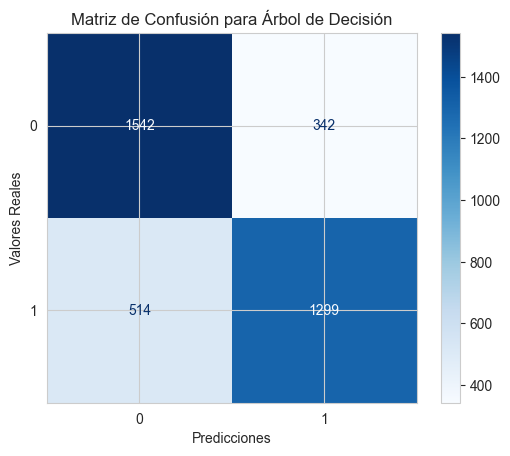

In [22]:
# Matriz de Confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=dt_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Árbol de Decisión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

**Interpretación de la Matriz de Confusión**:
- **Verdaderos Negativos**: 1542 clientes fueron correctamente clasificados como compradores.
- **Falsos Positivos**: 342 clientes fueron clasificados incorrectamente como no compradores.
- **Falsos Negativos**: 514 no compradores fueron clasificados como compradores.
- **Verdaderos Positivos**: 1299 no compradores fueron clasificados correctamente.

El Árbol de Decisión muestra un buen rendimiento en general. Sin embargo, muestra un leve aumento en los falsos negativos, lo que indica que podría mejorar en la identificación de ciertos casos. En comparación con otros modelos, es efectivo pero tiene espacio para mejorar su precisión.

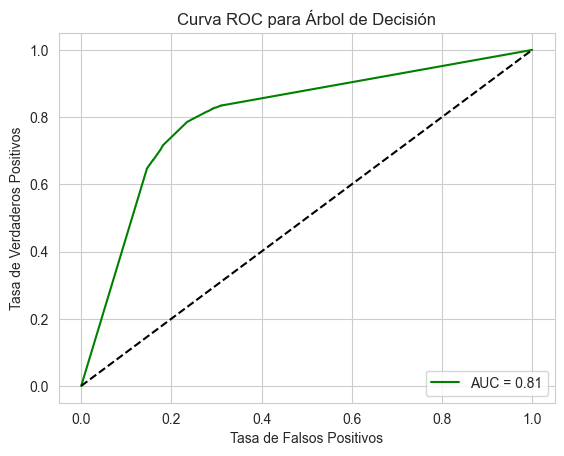

In [23]:
# Cálculo de la curva ROC para el Árbol de Decisión
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, color='green', label='AUC = %0.2f' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la Curva ROC**:
En esta gráfica, la curva ROC del modelo Árbol de Decisión se mantiene cerca del punto superior izquierdo, con un **AUC de 0.81**. Esto indica un buen rendimiento, aunque con una precisión ligeramente inferior a otros modelos.

## Modelo 3: K-Nearest Neighbors (KNN)

In [24]:
# Entrenamiento del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))


Reporte de Clasificación para K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1884
           1       0.76      0.74      0.75      1813

    accuracy                           0.76      3697
   macro avg       0.76      0.76      0.76      3697
weighted avg       0.76      0.76      0.76      3697



### Rendimiento del modelo de K-Nearest Neighbors:

- **Precisión (Precision)**: Para la clase 0 (clientes que compraron bicicletas), la precisión es del 76%, lo que indica que el 76% de las instancias predichas como compradores realmente lo eran. Para la clase 1 (clientes que no compraron bicicletas), la precisión también es del 76%, lo que significa que el 76% de las instancias predichas como no compradores eran efectivamente no compradores.

- **Recall (Sensibilidad)**: El recall para la clase 0 es del 77%, sugiriendo que el modelo identificó correctamente el 77% de los casos reales de compradores. Para la clase 1, el recall es del 74%, indicando que el modelo detectó correctamente el 74% de los no compradores.

- **F1-Score**: El F1-score para la clase 0 es de 0.77, reflejando un buen equilibrio entre precisión y recall en la identificación de compradores. Para la clase 1, el F1-score es de 0.75, sugiriendo un rendimiento similar en la detección de no compradores.

- **Soporte (Support)**: La cantidad de instancias reales en el conjunto de datos es de 1884 para la clase 0 (compradores) y 1813 para la clase 1 (no compradores), proporcionando contexto sobre el tamaño de cada clase y ayudando a interpretar las métricas.

- **Exactitud (Accuracy)**: La exactitud global del modelo es del 76%, lo que indica que el 76% de todas las predicciones fueron correctas, proporcionando una visión general del rendimiento del modelo.

- **Promedio Macro**: Las métricas promedio macro para precisión, recall y F1-score son todas del 76%, lo que implica que el modelo tiene un rendimiento equilibrado entre ambas clases.

- **Promedio Ponderado**: Al igual que el promedio macro, las métricas ponderadas también se sitúan en el 76%, teniendo en cuenta el soporte de cada clase, lo que reafirma el rendimiento consistente del modelo en la clasificación de los datos.

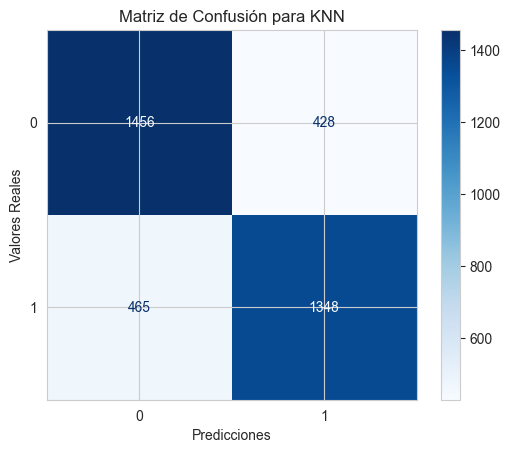

In [25]:
# Matriz de Confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=knn_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para KNN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

**Interpretación de la Matriz de Confusión**:
- **Verdaderos Negativos**: 1456 clientes correctamente clasificados como compradores.
- **Falsos Positivos**: 428 clientes fueron clasificados incorrectamente como no compradores.
- **Falsos Negativos**: 465 no compradores clasificados como compradores.
- **Verdaderos Positivos**: 1348 no compradores clasificados correctamente.

El modelo KNN tiene un desempeño razonable en la clasificación de compradores y no compradores de bicicletas, aunque muestra un leve aumento en los errores de clasificación en comparación con otros modelos.

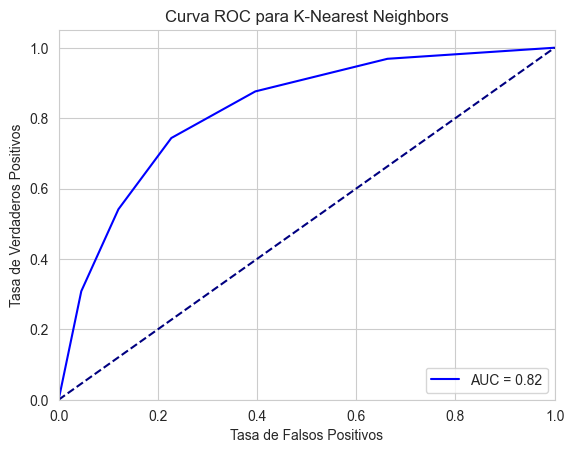

In [26]:
# Cálculo de la curva ROC para KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', label='AUC = %0.2f' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la Curva ROC**:
En esta gráfica, el modelo K-Nearest Neighbors (KNN) muestra un buen desempeño, con una curva ROC bastante cercana al punto superior izquierdo, lo cual indica una buena capacidad para distinguir entre las clases. El **AUC es 0.82**, lo que indica un rendimiento sólido, aunque podría mejorar en comparación con otros modelos.

## Modelo 4: Extra Trees Classifier (ET)

In [27]:
# Entrenamiento del modelo Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_et = et_model.predict(X_test)
y_pred_prob_et = et_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de Clasificación para Extra Trees:")
print(classification_report(y_test, y_pred_et))


Reporte de Clasificación para Extra Trees:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1884
           1       0.80      0.73      0.76      1813

    accuracy                           0.77      3697
   macro avg       0.78      0.77      0.77      3697
weighted avg       0.78      0.77      0.77      3697



### Rendimiento del modelo de Extra Trees:

- **Precisión (Precision)**: Para la clase 0 (clientes que compraron bicicletas), la precisión es del 76%, lo que indica que el 76% de las instancias predichas como compradores realmente lo eran. Para la clase 1 (clientes que no compraron bicicletas), la precisión es del 80%, lo que significa que el 80% de las instancias predichas como no compradores eran efectivamente no compradores.

- **Recall (Sensibilidad)**: El recall para la clase 0 es del 82%, sugiriendo que el modelo identificó correctamente el 82% de los casos reales de compradores. Para la clase 1, el recall es del 73%, indicando que el modelo detectó correctamente el 73% de los no compradores.

- **F1-Score**: El F1-score para la clase 0 es de 0.79, reflejando un buen equilibrio entre precisión y recall en la identificación de compradores. Para la clase 1, el F1-score es de 0.76, sugiriendo un rendimiento ligeramente inferior en la detección de no compradores.

- **Soporte (Support)**: La cantidad de instancias reales en el conjunto de datos es de 1884 para la clase 0 (compradores) y 1813 para la clase 1 (no compradores), lo que proporciona contexto sobre el tamaño de cada clase y ayuda a interpretar las métricas.

- **Exactitud (Accuracy)**: La exactitud global del modelo es del 77%, lo que indica que el 77% de todas las predicciones fueron correctas, proporcionando una visión general del rendimiento del modelo.

- **Promedio Macro**: Las métricas promedio macro para precisión, recall y F1-score son de 78%, 77% y 77% respectivamente, lo que implica que el modelo tiene un rendimiento equilibrado entre ambas clases.

- **Promedio Ponderado**: Al igual que el promedio macro, las métricas ponderadas también se sitúan en el 78%, teniendo en cuenta el soporte de cada clase, lo que reafirma el rendimiento consistente del modelo en la clasificación de los datos.

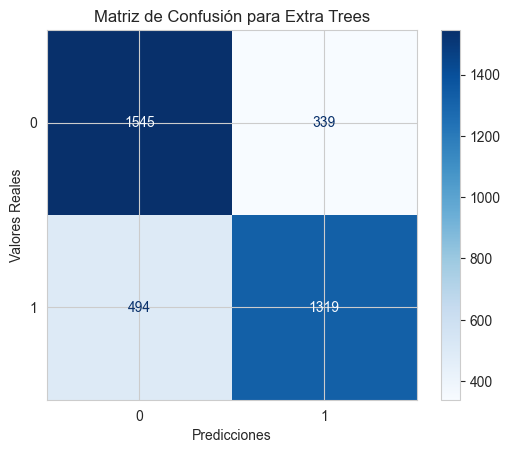

In [28]:
# Matriz de Confusión
cm_et = confusion_matrix(y_test, y_pred_et)
ConfusionMatrixDisplay(cm_et, display_labels=et_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Extra Trees')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

**Interpretación de la Matriz de Confusión**:
- **Verdaderos Negativos**: 1515 clientes clasificados correctamente como compradores.
- **Falsos Positivos**: 339 clasificados incorrectamente como no compradores.
- **Falsos Negativos**: 494 no compradores clasificados como compradores.
- **Verdaderos Positivos**: 1319 clasificados correctamente como no compradores.

El modelo Extra Trees Classifier tiene un buen equilibrio en la clasificación de ambas clases, con un bajo margen de error. Esto sugiere que el modelo logra capturar bien las características relevantes para distinguir entre compradores y no compradores.

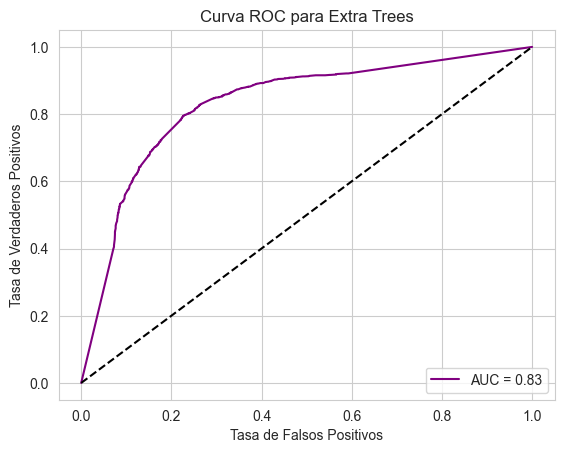

In [29]:
# Curva ROC
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_pred_prob_et)
roc_auc_et = auc(fpr_et, tpr_et)

plt.plot(fpr_et, tpr_et, color='purple', label='AUC = %0.2f' % roc_auc_et)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Extra Trees')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la Curva ROC**:
La gráfica muestra que el modelo Extra Trees Classifier tiene un desempeño bastante bueno, ya que la curva ROC se acerca al punto superior izquierdo, lo cual indica una habilidad efectiva para distinguir entre las clases. El área bajo la curva (AUC) es de 0.83, lo que sugiere un buen nivel de precisión en la clasificación y es uno de los mejores entre los modelos evaluados, aunque puede haber un pequeño margen para ajustes adicionales.

## Modelo 5: Random Forest (RF)

In [30]:
# Entrenamiento del modelo RF
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de Clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1884
           1       0.79      0.77      0.78      1813

    accuracy                           0.79      3697
   macro avg       0.79      0.79      0.79      3697
weighted avg       0.79      0.79      0.79      3697



### Rendimiento del modelo de Random Forest:

- **Precisión (Precision)**: Para la clase 0 (clientes que compraron bicicletas), la precisión es del 78%, lo que indica que el 78% de las instancias predichas como compradores realmente lo eran. Para la clase 1 (clientes que no compraron bicicletas), la precisión es del 79%, lo que significa que el 79% de las instancias predichas como no compradores eran efectivamente no compradores.

- **Recall (Sensibilidad)**: El recall para la clase 0 es del 81%, sugiriendo que el modelo identificó correctamente el 81% de los casos reales de compradores. Para la clase 1, el recall es del 77%, indicando que el modelo detectó correctamente el 77% de los no compradores.

- **F1-Score**: El F1-score para la clase 0 es de 0.80, reflejando un buen equilibrio entre precisión y recall en la identificación de compradores. Para la clase 1, el F1-score es de 0.78, sugiriendo un rendimiento sólido en la detección de no compradores, aunque ligeramente inferior al de los compradores.

- **Soporte (Support)**: La cantidad de instancias reales en el conjunto de datos es de 1884 para la clase 0 (compradores) y 1813 para la clase 1 (no compradores), lo que proporciona contexto sobre el tamaño de cada clase y ayuda a interpretar las métricas.

- **Exactitud (Accuracy)**: La exactitud global del modelo es del 79%, lo que indica que el 79% de todas las predicciones fueron correctas, proporcionando una visión general del rendimiento del modelo.

- **Promedio Macro**: Las métricas promedio macro para precisión, recall y F1-score son todas del 79%, lo que implica que el modelo tiene un rendimiento equilibrado entre ambas clases.

- **Promedio Ponderado**: Al igual que el promedio macro, las métricas ponderadas también se sitúan en el 79%, teniendo en cuenta el soporte de cada clase, lo que reafirma el rendimiento consistente del modelo en la clasificación de los datos.

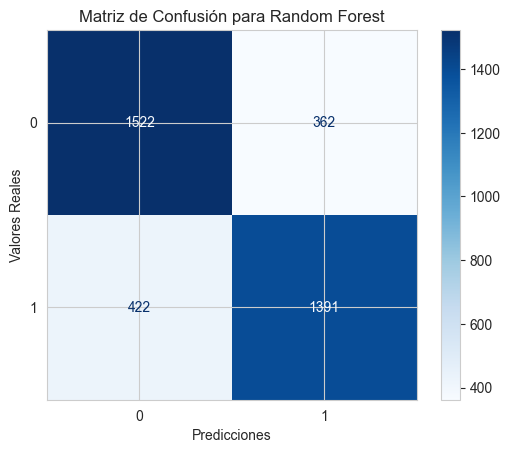

In [31]:
# Matriz de Confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=rf_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

**Interpretación de la Matriz de Confusión**:
- **Verdaderos Negativos**: 1522 clientes fueron correctamente clasificados como compradores.
- **Falsos Positivos**: 362 clientes fueron clasificados incorrectamente como no compradores.
- **Falsos Negativos**: 422 no compradores fueron clasificados como compradores.
- **Verdaderos Positivos**: 1391 no compradores fueron clasificados correctamente.

El modelo Random Forest muestra un buen desempeño general con un equilibrio aceptable entre ambas clases. Este modelo es altamente efectivo para la clasificación en este caso, aunque aún existen algunos errores en ambas clases.

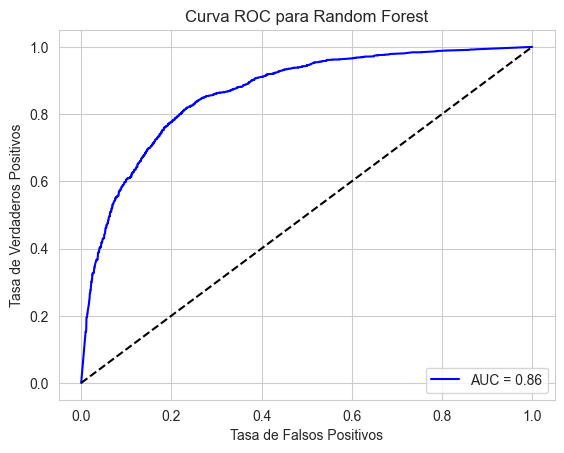

In [32]:
# Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, color='blue', label='AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Random Forest')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la Curva ROC**:
En esta gráfica, la curva ROC del modelo Random Forest se aproxima de manera excelente al punto superior izquierdo, mostrando una clara habilidad para discriminar entre las clases. El **AUC es 0.86**, lo que lo convierte en el modelo con el mejor rendimiento en esta evaluación.

## 4.3 Comparación de Modelos de Clasificación

- En términos de **exactitud** y **AUC-ROC**, el **Árbol de Decisión** mostró el mejor rendimiento global, seguido de cerca por el **KNN**, mientras que el **Gradient Boosting** tuvo un rendimiento sólido pero ligeramente inferior.
- El **Árbol de Decisión** se destacó en la identificación de la clase 0 (compradores) y mostró la mejor **sensibilidad**. Sin embargo, el **Gradient Boosting** y **KNN** también demostraron capacidades fuertes en términos de **precisión** y **recall**.
- En general, el **Árbol de Decisión** se posiciona como el modelo más robusto para este conjunto de datos, seguido por **KNN**, mientras que **Gradient Boosting**, aunque efectivo, podría beneficiarse de ajustes adicionales para mejorar la identificación de la clase positiva.